# Udacity Nanodegree Program - Data Scientist Capstone Project

## Prediction of french companies going out of business using publicly available information


## Project overview

This project is made of essentially of the followig parts:
- Part 1: Explore the data to better understand the structure of the data
- Part 2: Build an ETL pipeline to get together the information in a form usable for the machine learning pipeline (data processing, feature engineering, ...)
- Part 3: Build and test various machine learning models and chose the appropriate one for our project
- Part 4: Discuss the results and explore opportunities to go further

## Problem statement

Every year many thousands of companies go out of business, while some of those might have been able to continue, if the appropriate support (expertise and/or funds) would have been available.

I have personally been active in the field of restructuring for almost 10 years, buying and restructuring SMEs in France and in Germany. One problem is to identify those companies before it is too late and if possible spot this opportunity before other competing private equity funds or private investors do.

Through this project I want to be able to predict which companies will likely go out of business in 12 to 24 months time. By having a good enough model, one could contact those companies and either propose a restructuring consulting or buy and restructure those. 

Having found the relevant (public) information for french companies, 


## Metrics

We will see in the Part 1 of the analysis that (fortunately) very few companies go each year ouf of business (a few % of the ones which can be found on public registries). This means that looking for accuracy will not be of much help, and in this case we are rather interested in the precision of our predictions: e.g. that we correctly predict that one company will go in 12 to 24 months out of business. This is particularly important because the process of contacting current company owners to potentially buy their company is extremely time intensive and costly.

**The metric to be optimized will be the prediction precision of companies going out of business in 12 to 24 months. Especially I will be looking at predicting those based on information published in 2017 in the official french registries and the companies that went out of business in 2019 (January to October)**

## PROJECT

### Part 0: Import libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Additional libraries


### Part 1: Data exploration

#### 1.1 Import files

Files were previously downloaded from the official site under https://opendata.datainfogreffe.fr/explore/?sort=modified

File named "chiffres-cles-2017.csv" contains the financial information along with company ones (name, address, type of business, legal form, ...).
The file names "societes-radiees-2019.csv" contains the list of all companies that were "delisted" in 2019 (January til October 2019).

Licence information can be found, in French, under (https://www.etalab.gouv.fr/wp-content/uploads/2017/04/ETALAB-Licence-Ouverte-v2.0.pdf). Basically the use of those information is free, one only needs to mention where the data has been used from. 

In [3]:
# Two types of data / information
data_2017 = pd.read_csv("chiffres-cles-2017.csv", sep = ";") ## for the financial information published
radiations_2019 = pd.read_csv("societes-radiees-2019.csv", sep = ";") ## List of companies that were suppressed in 2019 (until End of October 2019)

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1,7,15,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 1.2 Explore data / files

##### 1.2.1 Financial information

This data summarizes the information that was published in the fiscal year ending in 2017 for french companies. This file contains the last 3 fiscal years and some general information about the companies (name, address, ...).

In [4]:
# Overview of the dataframe
data_2017.head()

,Dénomination,Siren,Nic,Forme Juridique,Code APE,Libellé APE,Adresse,Code postal,Ville,Num. dept.,...,Millesime 3,Date de cloture exercice 3,Durée 3,CA 3,Résultat 3,Effectif 3,fiche_identite,tranche_ca_millesime_1,tranche_ca_millesime_2,tranche_ca_millesime_3
0,DANPER CONSEIL,431460971,10.0,Societe a responsabilite limitee a associe unique,7022Z,Conseil pour les affaires et autres conseils d...,17 RUE ANDRE LE NOTRE,67206,MITTELHAUSBERGEN,67.0,...,2015,2015-09-30,12.0,88775.0,871.0,NaN,https://www.infogreffe.fr/infogreffe/ficheIden...,NaN,NaN,C entre 82K et 250K
1,SARL ALIANE,790362081,16.0,Societe a responsabilite limitee,5610A,Restauration traditionnelle,15 RUE FULTON,18000,BOURGES,18.0,...,2015,2015-12-31,12.0,NaN,NaN,NaN,https://www.infogreffe.fr/infogreffe/ficheIden...,NaN,NaN,NaN
2,ETABLISSEMENTS GOUDY & CIE,397120387,14.0,Societe par actions simplifiee,4621Z,"Comm. de gros (comm. interent.) cere., tabac n...",PLACE DE LA MAIRIE,32380,ST CLAR,32.0,...,2015,2015-06-30,12.0,14796337.0,131681.0,13.0,https://www.infogreffe.fr/infogreffe/ficheIden...,E + d 1M,E + d 1M,E + d 1M
3,SIMARO II,348786336,76.0,Societe a responsabilite limitee,6810Z,Activites des marchands de biens immobiliers,33 A AVENUE JULES CANTINI,13006,MARSEILLE,13.0,...,2015,2015-06-30,12.0,33626.0,9084.0,NaN,https://www.infogreffe.fr/infogreffe/ficheIden...,NaN,NaN,B entre 32K et 82K
4,HOMAGECO,815206537,12.0,Societe a responsabilite limitee a associe unique,7010Z,Activites des sieges sociaux,133 RUE GARIBALDI,69003,LYON,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.infogreffe.fr/infogreffe/ficheIden...,B entre 32K et 82K,B entre 32K et 82K,NaN


In [5]:
# Size of dataframe (nb of records and nb of features)
data_2017.shape

(1154008, 41)

**INFO**

In those records, over 1 Mio companies are listed, and through 41 columns information about the companies and their published results.

In [6]:
# Name of columns and feature names
data_2017.columns

Index(['Dénomination', 'Siren', 'Nic', 'Forme Juridique', 'Code APE',
       'Libellé APE', 'Adresse', 'Code postal', 'Ville', 'Num. dept.',
       'Département', 'Région', 'Code Greffe', 'Greffe',
       'Date immatriculation', 'Date radiation', 'Statut', 'Geolocalisation',
       'Date de publication', 'Millesime 1', 'Date de cloture exercice 1',
       'Durée 1', 'CA 1', 'Résultat 1', 'Effectif 1', 'Millesime 2',
       'Date de cloture exercice 2', 'Durée 2', 'CA 2', 'Résultat 2',
       'Effectif 2', 'Millesime 3', 'Date de cloture exercice 3', 'Durée 3',
       'CA 3', 'Résultat 3', 'Effectif 3', 'fiche_identite',
       'tranche_ca_millesime_1', 'tranche_ca_millesime_2',
       'tranche_ca_millesime_3'],
      dtype='object')

In [7]:
# Data types
data_2017.dtypes

Dénomination                   object
Siren                          object
Nic                           float64
Forme Juridique                object
Code APE                       object
Libellé APE                    object
Adresse                        object
Code postal                    object
Ville                          object
Num. dept.                    float64
Département                    object
Région                         object
Code Greffe                   float64
Greffe                         object
Date immatriculation           object
Date radiation                 object
Statut                         object
Geolocalisation               float64
Date de publication            object
Millesime 1                   float64
Date de cloture exercice 1     object
Durée 1                       float64
CA 1                          float64
Résultat 1                    float64
Effectif 1                    float64
Millesime 2                   float64
Date de clot

In [8]:
np.array(data_2017.dtypes)

array([dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O')], dtype=object)

**INFO**

-> Some cleaning will need to be made as:

Many columns have not the expected type:
- dates are not dates
- strings as objects
- siren (company ID) as object instead of integer or string
--> They will need to be cleaned to go further

Some columns have (for this analysis) no real interest:
- Nic, Adresse, Code postal, Code postal, Département, Région, Code Greffe, Greffe, Statut, Geolocalisation, fiche_identite, tranche_ca_millesime_1, tranche_ca_millesime_2, tranche_ca_millesime_3
and will need to be removed

In [10]:
# How many NAs are there in the dataset across the features / columns
nas = np.round(data_2017.isna().sum() / data_2017.shape[0] * 100,1)
nas = nas.sort_values(ascending = False)
print(nas)

Geolocalisation               100.0
Date radiation                100.0
Effectif 1                     88.7
Effectif 2                     83.3
Effectif 3                     80.5
CA 2                           58.6
Résultat 2                     58.1
CA 1                           57.8
tranche_ca_millesime_2         57.8
tranche_ca_millesime_1         57.1
Résultat 1                     56.7
CA 3                           53.6
Résultat 3                     53.3
tranche_ca_millesime_3         52.9
Millesime 3                    21.1
Durée 3                        21.1
Date de cloture exercice 3     21.1
Millesime 2                    12.9
Date de cloture exercice 2     12.9
Durée 2                        12.9
Code APE                        2.1
Libellé APE                     2.1
Région                          1.4
Département                     1.4
Adresse                         0.8
Num. dept.                      0.1
Code postal                     0.1
Ville                       

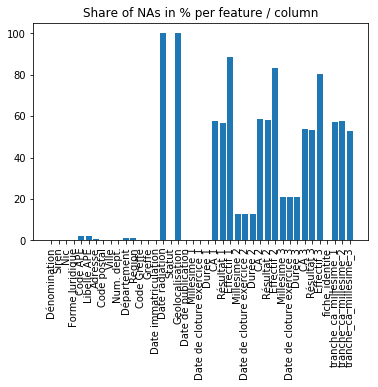

In [9]:
# Graphical visualization of NAs per column / feature
plt.bar(np.array(data_2017.columns), nas);
plt.xticks(rotation='vertical');
plt.title("Share of NAs in % per feature / column");
plt.savefig('share_nas_columns_2017.png')

**INFO**

This data has many NAs and some columns have almost only NAs and no imputing then makes sense
- Geolocalisation, Date radiation, Effectif 1, Effectif 2, Effectif 3

Others have ca. 50% of NAs, imputation could be of interest, although probably not very meaningfull 
- CA 1, Résultat 1, CA 2, Résultat 2, CA 3, Résultat 3, tranche_ca_millesime_1, tranche_ca_millesime_2, tranche_ca_millesime_3

In [10]:
# Nb of possible values for different features
print("Nb of possible legal forms: ", data_2017["Forme Juridique"].nunique())
print("Nb of possible business types: ", data_2017["Code APE"].nunique())

Nb of possible legal forms:  160
Nb of possible business types:  1055


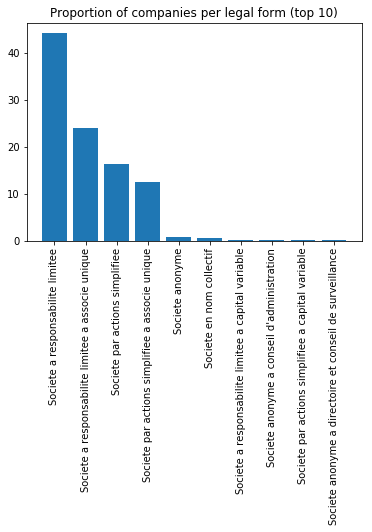

In [11]:
# Research into the legal forms and whether or not we can reduce the "dimensionality"
legal_forms = data_2017.groupby("Forme Juridique")["Siren"].count().sort_values(ascending = False) / data_2017.shape[0] * 100
plt.bar(legal_forms.index[:10], legal_forms[:10]);
plt.xticks(rotation='vertical');
plt.title("Proportion of companies per legal form (top 10)");
plt.savefig('share_legal_forms_2017.png')

In [12]:
# From the graph, one can also see that very few legal forms represent the most number of companies
print(np.round(legal_forms[:10],1))

Forme Juridique
Societe a responsabilite limitee                           44.3
Societe a responsabilite limitee a associe unique          24.0
Societe par actions simplifiee                             16.4
Societe par actions simplifiee a associe unique            12.6
Societe anonyme                                             0.9
Societe en nom collectif                                    0.6
Societe a responsabilite limitee a capital variable         0.2
Societe anonyme a conseil d'administration                  0.2
Societe par actions simplifiee a capital variable           0.1
Societe anonyme a directoire et conseil de surveillance     0.1
Name: Siren, dtype: float64


In [13]:
# Wrt business types, through research the 1st 2 characters are likely sufficient for this project
data_2017["bus_types"] = data_2017["Code APE"].apply(lambda x: str(x)[:2])

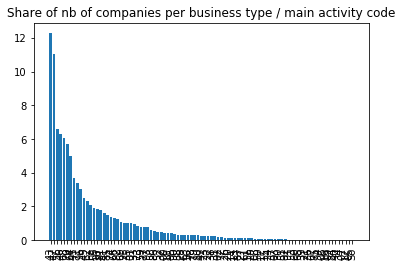

In [14]:
bus_types = data_2017.groupby("bus_types")["Siren"].count().sort_values(ascending = False) / data_2017.shape[0] * 100
plt.bar(bus_types.index, bus_types);
plt.title("Share of nb of companies per business type / main activity code");
plt.xticks(rotation='vertical');
plt.savefig("share_activities.png")

In [15]:
# Print most common business types & their share, as well as the nb of those
print("top 10 business types / activities", np.round(bus_types[:10],2))
print("There are {} different 2 digits business types in the dataset".format(len(bus_types)))

top 10 business types / activities bus_types
43    12.29
47    11.02
56     6.57
46     6.29
68     6.08
70     5.73
64     4.98
45     3.70
71     3.40
96     3.06
Name: Siren, dtype: float64
There are 91 different 2 digits business types in the dataset


**INFO**
- Legal form: only 4 types of legal forms are of interest, the rest can be summed up in a category
- All business types are of interest and can be kept as such (only first 2 characters)

In [16]:
# Check if some import features have the correct information fed in

In [17]:
# Millesime 1: first fiscal year
data_2017.groupby("Millesime 1")['Siren'].count()

Millesime 1
2017.0    1153463
Name: Siren, dtype: int64

In [18]:
# Millesime 2: second fiscal year
data_2017.groupby("Millesime 2")['Siren'].count()

Millesime 2
0.0             1
1.0             1
6.0             1
15.0            1
63.0            1
603.0           1
2016.0    1005472
Name: Siren, dtype: int64

In [19]:
# Millesime 3: third fiscal year
data_2017.groupby("Millesime 3")['Siren'].count()

Millesime 3
0.0               1
63.0              1
2015.0       807657
20455.0           1
30847.0           1
2015         103131
3313              1
686377000         1
CdcRes            8
Name: Siren, dtype: int64

##### 1.2.2 so called "Radiations"

This data lists all companies that were "radiated" in 2019, e.g. that were suppressed from the register in that year. All information is also available (some redundancies with the financial information file)

In [20]:
# Size of data file
radiations_2019.shape

(120463, 29)

In [21]:
# Overview of dataframe
radiations_2019.head()

,Dénomination,Siren,Nic,Forme Juridique,Code APE,Secteur d'activité,Adresse,Code postal,Ville,Num. dept.,...,Nom commercial,Date immatriculation origine,Sigle,Devise,Durée,Date cloture 1er exercice,Date arreté des comptes,Etat,etat_pub,fiche_identite
0,A PA PEUR OFFICIEL FRANCE,524279551,13.0,Societe a responsabilite limitee a associe unique,4771Z,Commerce de detail d'habillement en magasin sp...,4 RUE CIAPETTA,06500,MENTON,6.0,...,NaN,NaN,APPOF,Euros,NaN,12/31/2011,31/12,Radié,A,https://www.infogreffe.fr/infogreffe/ficheIden...
1,ALUMINIUM VERANDAS PLAISIR,400088621,18.0,Societe a responsabilite limitee,4332B,Travaux de menuiserie metallique et serrurerie,79 RUE DE LA GARE,78370,PLAISIR,78.0,...,NaN,NaN,AVP,Euros,NaN,NaN,31/12,Radié,A,https://www.infogreffe.fr/infogreffe/ficheIden...
2,AUTUMN FUN SARL,529862427,26.0,Societe a responsabilite limitee,7410Z,Activites specialisees de design,21 PLACE DE LA REPUBLIQUE,75003,PARIS,75.0,...,NaN,NaN,NaN,Euros,NaN,12/31/2011,31/12,Radié,A,https://www.infogreffe.fr/infogreffe/ficheIden...
3,AUX DELICES D'ARVOR,395253560,27.0,Societe a responsabilite limitee a associe unique,1071C,Boulangerie et boulangerie-patisserie,RUE ROBERT SCHUMAN,56100,LORIENT,56.0,...,NaN,NaN,NaN,Euros,NaN,NaN,30/6,Radié,A,https://www.infogreffe.fr/infogreffe/ficheIden...
4,BATIMENT RENOVATION ELECTRICITE,421282286,10.0,Societe a responsabilite limitee,4120A,Construction de maisons individuelles,37 RUE D AMSTERDAM,75008,PARIS,75.0,...,NaN,NaN,B R E,Euros,NaN,NaN,31/12,Radié,A,https://www.infogreffe.fr/infogreffe/ficheIden...


In [22]:
# Columns / feature names
radiations_2019.columns

Index(['Dénomination', 'Siren', 'Nic', 'Forme Juridique', 'Code APE',
       'Secteur d'activité', 'Adresse', 'Code postal', 'Ville', 'Num. dept.',
       'Département', 'Région', 'Code Greffe', 'Greffe',
       'Date immatriculation', 'Date radiation', 'Statut', 'Geolocalisation',
       'Date de publication', 'Nom commercial', 'Date immatriculation origine',
       'Sigle', 'Devise', 'Durée', 'Date cloture 1er exercice',
       'Date arreté des comptes', 'Etat', 'etat_pub', 'fiche_identite'],
      dtype='object')

In [23]:
# Data types of columns / features
radiations_2019.dtypes

Dénomination                     object
Siren                             int64
Nic                             float64
Forme Juridique                  object
Code APE                         object
Secteur d'activité               object
Adresse                          object
Code postal                      object
Ville                            object
Num. dept.                      float64
Département                      object
Région                           object
Code Greffe                       int64
Greffe                           object
Date immatriculation             object
Date radiation                   object
Statut                           object
Geolocalisation                  object
Date de publication              object
Nom commercial                  float64
Date immatriculation origine     object
Sigle                            object
Devise                           object
Durée                           float64
Date cloture 1er exercice        object


In [24]:
# Check when were those companies created
radiations_2019["yob"] = pd.to_datetime(radiations_2019['Date immatriculation origine']).apply(lambda x: x.year)

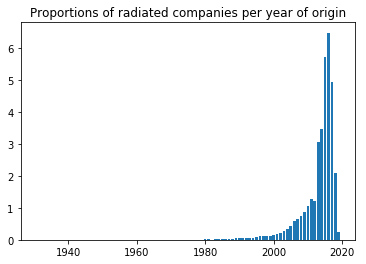

In [25]:
# Plot when those companies were created in % of all radiated companies
rads_year = radiations_2019.groupby("yob")["Siren"].count() / radiations_2019.shape[0] * 100
plt.bar(rads_year.index.astype(int), rads_year);
plt.title("Proportions of radiated companies per year of origin");
plt.savefig("proportions_radiations_per_year_of_origin.png")

**INFO**

From the radiations file I only need to match the company ID and the radiation date to the main file (financial information)

### Part 2: ETL Pipeline - data cleaning, pre-processing, feature engineering

#### 3.1 Data cleaning and processing

In [26]:
# Remove uninteresting and not usable information
col_to_keep = ['Dénomination', 'Siren', 'Forme Juridique', 'Code APE', 'Num. dept.', 'Date immatriculation', 
               'Date de publication', 'Date de cloture exercice 1', 'Date de cloture exercice 2', 
               'Date de cloture exercice 3', 'CA 1']

col_dates = ['Date immatriculation', 'Date de publication', 'Date de cloture exercice 1', 
             'Date de cloture exercice 2', 'Date de cloture exercice 3']


In [27]:
def clean_process(df, df_rad, merge_df = True):
    '''
    This function cleans the financial information data frame across many steps
    
    INPUT: 
    df = DataFrame to clean
    col_to_keep = columns to keep in the dataframe
    col_dates = columns that need to be converted into a date format
    
    RETURN:
    df = cleaned dataframe
       
    '''
    
    # Assign inputs
    df = df
    df_rad = df_rad
    
    col_to_keep = ['Dénomination', 'Siren', 'Forme Juridique', 'Code APE', 'Num. dept.', 'Date immatriculation', 
               'Date de publication', 'Date de cloture exercice 1', 'Date de cloture exercice 2', 
               'Date de cloture exercice 3', 'CA 1']

    col_dates = ['Date immatriculation', 'Date de publication', 'Date de cloture exercice 1', 
             'Date de cloture exercice 2', 'Date de cloture exercice 3']
    
    # Retain columns for pre-processing
    df = df.loc[:, col_to_keep]
    
    # Convert date columns into dateformat
    for col in col_dates:
        df[col] = pd.to_datetime(df[col])
        
    # Record in new column if financial information (turnover) was published on last year
    df['publish'] = df['CA 1'].isna().astype(int)
    df.drop("CA 1", axis = 1, inplace = True)
    
    # Drop all rows with at least one NA; I still keep most of the information available
    df.dropna(axis = 0, how = 'any', inplace = True) 
    
    # Calculate delay between end of fiscal year and date of publishing
    df["delay"] = df["Date de publication"] - df["Date de cloture exercice 1"]
    df.delay = df.delay.apply(lambda x: int(x.days))
    
    # Calculate age of company in 2019 when radiations are recorded
    df['yob'] = df["Date immatriculation"].apply(lambda x: x.year)
    
    # Remove columns after pre-processing
    df.drop(['Dénomination', 'Date immatriculation', 'Date de publication', 'Date de cloture exercice 1', 
                  'Date de cloture exercice 2', 'Date de cloture exercice 3'], axis = 1, inplace = True)
    
    # Convert Siren into integer to merge with other information
    df.Siren = df.Siren.astype(int)
    
    # Merge information with radiations file if dataframe is there and merge_df == True
    if merge_df == False:
        
        df_merge = df
        
    else:
                
        df_rad = df_rad.iloc[:, 1:3]
        df_merge = df.merge(df_rad, how = 'left', on = 'Siren')
    
        # indicate radiation
        df_merge["rad"] = 1 - df_merge["Nic"].isna().astype(int)
        
        # remove last not interesting column
        df_merge.drop("Nic", axis = 1, inplace = True)
    
    
    # format column names
    col = np.array(df_merge.columns)
    new_col = []
    for co in col:
        new_col.append(co.lower().replace(" ", "_").replace(".", ""))
    df_merge.columns = new_col
    
    # Create a feature with the age in years of the company
    df_merge["age"] = df_merge["yob"].apply(lambda x: int(2019 - x))
    df_merge.drop("yob", axis = 1, inplace = True)
    
    # Convert department number into an integer
    df_merge.num_dept = df_merge.num_dept.astype(int)
    
    # Transform business type into a new APE code 
    df_merge.code_ape = df_merge.code_ape.astype(str)
    df_merge["new_ape"] = df_merge["code_ape"].apply(lambda x: str(x)[:2])
    df_merge.drop(["code_ape"], axis = 1, inplace = True)
    
    # Keep only the most important legal forms
    legal_form_to_keep = df_merge.groupby("forme_juridique")["age"].count().sort_values(ascending = False)[:4]
    legal_form_to_keep = np.array(legal_form_to_keep.index)
    df_merge["legal_form_simple"] = df_merge["forme_juridique"].apply(lambda x: x if x in legal_form_to_keep else "others")
    df_merge.drop(["forme_juridique"], axis = 1, inplace = True)
    
    # df_merge.drop("radiation_2019", axis = 1, inplace = True)
    
    # Scale delay and age
    ## Look at use of scaler outside of function
    # df_merge["delay_scaled"] = df_merge["delay"] / df_merge["delay"].max()
    # df_merge["age_scaled"] = df_merge["age"] / df_2017_merge["age"].max()
    # df_merge.drop(["age", "delay"], axis = 1, inplace = True)
    
    # Hot encode data
    df_final = pd.get_dummies(df_merge, columns=['num_dept', 'new_ape', 'legal_form_simple'], 
                             drop_first = True, prefix=['num_dept', 'new_ape', 'legal_form_simple'])

    
    return df_final

In [28]:
# Transform data using function
df_2017_19 = clean_process(data_2017, radiations_2019)

In [29]:
# Process additional years for later analysis
data_2015 = pd.read_csv("chiffres-cles-2015.csv", sep = ";")
data_2016 = pd.read_csv("chiffres-cles-2016.csv", sep = ";")
data_2018 = pd.read_csv("chiffres-cles-2018.csv", sep = ";")

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1,15,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
# Load radiations in other years
radiations_2018 = pd.read_csv("societes-radiees-2018.csv", sep = ";")
radiations_2017 = pd.read_csv("entreprises-radiees-2017.csv", sep = ";")

In [31]:
# Process other years similarly
df_2018 = clean_process(data_2018, None, False)

In [32]:
df_2016_18 = clean_process(data_2016, radiations_2018)

#### 3.2 Load

In [33]:
# Load data into a new CSV
df_2017_19.to_csv("cleaned_data_2017.csv", sep = ";")

In [34]:
df_2016_18.to_csv("cleaned_data_2016.csv", sep = ";")

In [35]:
df_2018.to_csv("cleaned_data_2018.csv", sep = ";")